# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_1\Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.9699999783188105


When finished, you can close the environment.

In [17]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
# Reset the environment    
env_info = env.reset(train_mode=True)[brain_name]     

# Number of agents
num_agents = len(env_info.agents)

# Size of each action
ENV_ACTION_SIZE = brain.vector_action_space_size

# Size of the state space 
states = env_info.vector_observations
ENV_STATE_SIZE = states.shape[1]

print('There are {} agents. Each observes a state with length: {} and act within an action space of length: {}'.format(states.shape[0], 
                                                                                                                       ENV_STATE_SIZE, 
                                                                                                                       ENV_ACTION_SIZE))

There are 1 agents. Each observes a state with length: 33 and act within an action space of length: 4


In [10]:
from torch.autograd import Variable
from torch import nn
import torch
import torch.nn.functional as F
import torch.optim as optim

In [28]:

import importlib, sys
importlib.reload(sys.modules['model77'])
importlib.reload(sys.modules['ddpg_agent15'])
from ddpg_agent15 import Agent
#from model77 import Actor, Critic

In [8]:
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent15 import Agent

In [2]:
import random
import numpy as np
from collections import deque
import time
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use('bmh')
np.set_printoptions(precision=3, linewidth=120)

In [4]:
# Agent default hyperparameters
BUFFER_SIZE = int(1e6)  # Replay buffer size
BATCH_SIZE = 256        # Batch size #128
GAMMA = 0.99            # Discount Factor #0.99
TAU = 1e-3              # Soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor 
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
ACTOR_FC1_UNITS = 256   # Number of units for L1 in the actor model
ACTOR_FC2_UNITS = 128   # Number of units for L2 in the actor model
CRITIC_FCS1_UNITS = 256 # Number of units for L1 in the critic model
CRITIC_FC2_UNITS = 128  # Number of units for L2 in the critic model
ADD_OU_NOISE = True     # Toggle Ornstein-Uhlenbeck noisy relaxation process
THETA = 0.15            # k/gamma -> spring constant/friction coefficient [Ornstein-Uhlenbeck]
MU = 0.                 # x_0 -> spring length at rest [Ornstein-Uhlenbeck]
SIGMA = 0.2             # root(2k_B*T/gamma) -> Stokes-Einstein for effective diffision [Ornstein-Uhlenbeck]
ENV_STATE_SIZE = states.shape[1] 

In [11]:
def ddpg(n_episodes=5000, max_t=500,
         state_size=ENV_STATE_SIZE, action_size=ENV_ACTION_SIZE, random_seed=10, 
         actor_fc1_units=ACTOR_FC1_UNITS, actor_fc2_units=ACTOR_FC2_UNITS,
         critic_fcs1_units=CRITIC_FCS1_UNITS, critic_fc2_units=CRITIC_FC2_UNITS,
         buffer_size=BUFFER_SIZE, batch_size=BATCH_SIZE,
         gamma=GAMMA, tau=TAU, lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY,
         add_ounoise=ADD_OU_NOISE, mu=MU, theta=THETA, sigma=SIGMA):  
    
    # Instantiate the Agent
    agent = Agent(state_size=state_size,action_size=action_size, random_seed=random_seed,
                  actor_fc1_units=actor_fc1_units, actor_fc2_units=actor_fc2_units,
                  critic_fcs1_units=critic_fcs1_units, critic_fc2_units=critic_fc2_units,
                  buffer_size=buffer_size, batch_size=batch_size,
                  gamma=gamma, tau=tau, lr_actor=lr_actor, lr_critic=lr_critic, 
                  weight_decay=weight_decay, add_ounoise=add_ounoise, mu=mu, theta=theta, 
                  sigma=sigma)
                  
    scores_deque = deque(maxlen=100)
    scores = []
    
    local_time = time.ctime(time.time())

    print('\nStart training:\t {}'.format(local_time))
    
    for i_episode in range(1, n_episodes+1):
        
        # Reset the env and get the state (Single Agent)
        env_info = env.reset(train_mode=True)[brain_name]     
        state = env_info.vector_observations[0]
        
        # Reset the DDPG Agent (Reset the internal state (= noise) to mean mu)
        agent.reset()
        start_time = time.time()
        
        # Reset the score 
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)                   # select an action 

            env_info=env.step(action)[brain_name]        # send action to the environment
            next_state = env_info.vector_observations[0] # get next state (Single Agent)
            reward = env_info.rewards[0]                 # get reward (Single Agent)
            done = env_info.local_done[0]                # see if episode finished (Single Agent)
            
            
            # Save experience in replay memory, and use random sample from buffer to learn
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        
        # Save scores and compute average score over last 100 episodes
        scores_deque.append(score)
        scores.append(score)
        avg_score = np.mean(scores_deque)
        dlit = time.time() - start_time
        
        print('\rEpisode {}\t ({} s.)\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, round(dlit), avg_score, score), end="")
        if i_episode % 100 == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_1.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            # Early stop
            if avg_score > 30:
                print('\rEnvironment solved in {} episodes with an Average Score of {:.2f}'.format(i_episode, avg_score))
                return scores
            print('\nEpisode {}\tAverage Score: {:.2f}'.format(i_episode, avg_score))  

    local_time = time.ctime(time.time())          
    print('\nEnd training:\t {}'.format(local_time))
    return scores


In [12]:
def plot_training_scores(scores):
    # Plot the Score evolution during the training
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.tick_params(axis='x', colors='tab:cyan')
    ax.tick_params(axis='y', colors='tab:cyan')
    plt.plot(np.arange(1, len(scores)+1), scores, color='tab:cyan')
    plt.xlabel('Number of Episodes', color='tab:green')
    plt.ylabel('Score', color='tab:green')
    plt.grid(True, color='tab:grey')      
    plt.show()



In [13]:
# Based on https://arxiv.org/pdf/1709.06560.pdf and Trial-and-Error
scores = ddpg(n_episodes=1500, 
              max_t=1000, 
              actor_fc1_units=128, 
              actor_fc2_units=128,
              critic_fcs1_units=128, 
              critic_fc2_units=128, 
              gamma=0.99, 
              tau=1e-3, 
              lr_actor=1e-4, 
              lr_critic=1e-4, 
              weight_decay=0.,
              add_ounoise=True, 
              mu=0., 
              theta=0.15, 
              sigma=0.15)


DDPG Agent Constructor 16 (parameters):

 state_size=33 action_size=4 random_seed=10 actor_fc1_units=128 actor_fc2_units=128 critic_fcs1_units=128 critic_fc2_units=128 buffer_size=1000000 batch_size=256 gamma=0.99 tau=0.001 lr_actor=0.0001 lr_critic=0.0001 weight_decay=0.0 add_ounoise=True mu=0.0 theta=0.15 sigma=0.15 


Start training:	 Wed Mar 24 12:00:04 2021
Episode 100	 (32 s.)	Average Score: 1.59	Score: 6.40
Episode 100	Average Score: 1.59
Episode 200	 (33 s.)	Average Score: 8.07	Score: 11.65
Episode 200	Average Score: 8.07
Episode 300	 (35 s.)	Average Score: 22.82	Score: 28.21
Episode 300	Average Score: 22.82
Episode 400	 (38 s.)	Average Score: 28.99	Score: 29.05
Episode 400	Average Score: 28.99
Environment solved in 500 episodes with an Average Score of 31.49


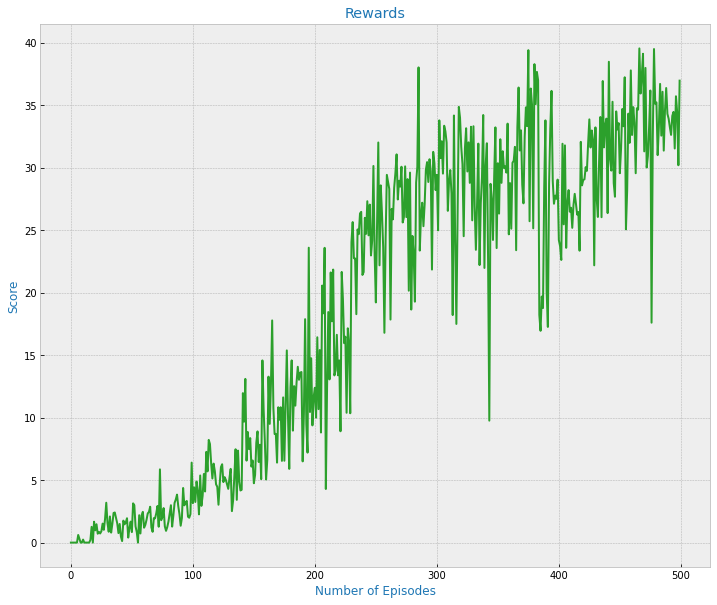

In [14]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, color='tab:green')
plt.title('Rewards', color='tab:blue')
plt.xlabel('Number of Episodes', color='tab:blue')
plt.ylabel('Score', color='tab:blue')
#plt.grid(False, color='tab:grey')      
plt.show()

In [16]:
with open('scores.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % score for score in scores)

### Result 
In the next code cell, you will load the trained weights from file to watch a smart agent!

In [12]:
from unityagents import UnityEnvironment

import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#env = UnityEnvironment(file_name="Banana_Windows_x86_64\Banana.exe")
env = UnityEnvironment(file_name='Reacher_Windows_x86_64_1\Reacher.exe')


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state_size = len(env_info.vector_observations[0])
print('States have length:', state_size)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States have length: 33


In [16]:
from ddpg_agent15 import Agent
agent = Agent(state_size, action_size)

# load the weights from file
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_1.pth'))


DDPG Agent Constructor 16 (parameters):

 state_size=33 action_size=4 random_seed=10 actor_fc1_units=128 actor_fc2_units=128 critic_fcs1_units=128 critic_fc2_units=128 buffer_size=100000 batch_size=128 gamma=0.995 tau=0.001 lr_actor=0.0001 lr_critic=0.0001 weight_decay=0 add_ounoise=True mu=0.0 theta=0.15 sigma=0.15 



In [18]:
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
for j in range(1000):
    action = agent.act(state)                     
    env_info = env.step(action)[brain_name]        
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state
    if done:                                       # exit loop if episode finished
        break

print("Score: {}".format(score))

Score: 35.31999921053648


In [19]:
env.close()